## **<h3 align="center">Movies - MetaData</h3>**
**Group members:**<br>
Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Ilona Nacu - 20211602@novaims.unl.pt - 20211602<br>
Francisco Farinha - 20211550@novaims.unl.pt - 20211550<br>
João Barradas - 20211590@novaims.unl.pt - 20211590<br>
Rafael Proença  - 2021681@novaims.unl.pt - 2021681<br>
## Introduction
This notebook will serve to the chat to have a database about the movies, in particular to have access to CritiScore of a movie available in the dataset, for simplicity we will call the database Metadata. To create the metadata, we will perform some preprocessing techniques. 

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Dataset](#chapter2)
* [3. Preprocessing](#chapter3)
    * [3.1. Massive Rotten Tomatoes Movies and Reviews](#section_3_1)
    * [3.2. Rotten Tomatoes Movies and Critic Reviews Dataset](#section_3_2)
    * [3.3. IMDB Top 250 Movies DataSet](#section_3_3)
    * [3.4. Reel Review Dataset](#section_3_4)
* [4. Merging the Datasets](#chapter4)
    * [4.1. Cleaning the Merged Dataset](#section_4_1)
    * [4.2. Genres](#section_4_2)
    * [4.3. CritiScore](#section_4_3)
    * [4.4. Saving the Metadata with CritiScores](#section_4_4)

-----------------------------
# 1. Import the Libraries <a class="anchor" id="chapter1"></a>
To run the following notebook, we need to firstly, add the imports.

In [63]:
# General imports
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# Data analysis and manipulation
import pandas as pd


------------------------------------------
# 2. Import the Dataset <a class="anchor" id="chapter2"></a>
Now we will open the csv files. Since our goal is to have a more complete dataset we will join this datasets. All the datasets were provided by Kaggle:
- rot_critic and rot_movies - https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews
 (Retrieved at 20 november)
- rot_movies2 and rot_2 - https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?select=rotten_tomatoes_critic_reviews.csv (Retrieved at 20 november)
- movies - https://www.kaggle.com/datasets/karkavelrajaj/imdb-top-250-movies (Retrieved at 20 november)
- reel_review - https://www.kaggle.com/datasets/s4lman/reelview-top-movie-lists-reviews (Retrieved at 20 november)

In [2]:
rot_critic = pd.read_csv(r'Data/Movie_Files/archive/rotten_tomatoes_critic_reviews.csv')
rot_movies = pd.read_csv(r'Data/Movie_Files/archive/rotten_tomatoes_movies.csv')
rot_movies2 = pd.read_csv(r'Data/Movie_files/archive (2)/rotten_tomatoes_movie_reviews.csv')
rot_2 = pd.read_csv(r'Data/Movie_files/archive (2)/rotten_tomatoes_movies.csv')
movies = pd.read_csv(r'Data/Movie_Files/movies.csv')
reel_review = pd.read_csv(r'Data\\Movie_Files\\ReelView.csv')

Let's have a first view, using head(), to check some important needs to the preprocessing.

In [3]:
print("\nRot_critic:")
rot_critic.head(3)


Rot_critic:


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...


In [4]:
print("\nRot_movies:")
rot_movies.head(3)


Rot_movies:


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


In [5]:
print("\nRot_movies2:")
rot_movies2.head(3)


Rot_movies2:


,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...


In [6]:
print("\nRot_2:")
rot_2.head(3)


Rot_2:


,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN


In [7]:
print("\Movies:")
movies.head(3)

\Movies:


,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...
2,3,tt0468569,The Dark Knight,2008,https://www.imdb.com/title/tt0468569,"2,684,051",9.0,PG-13,2h 32m,"Action,Crime,Drama",...,nm0634240,Christopher Nolan,"tt0468569,nm0634300,nm0634240,nm0275286,tt0468569","Writers,Jonathan Nolan,Christopher Nolan,David...",When the menace known as the Joker wreaks havo...,"ur87850731,ur1293485,ur129557514,ur12449122,ur...","MrHeraclius,Smells_Like_Cheese,dseferaj,little...","rw5478826,rw1914442,rw6606026,rw1917099,rw5170...","The Dark Knight,The Batman of our dreams! So m...","Confidently directed, dark, brooding, and pack..."


In [8]:
print("\nreel_review:")
reel_review.head(3)


reel_review:


,title,stars_rating,run_time,release_date,mpaa_rating,genre,director,cast
0,Terms of Endearment,2.5,132.0,1983.0,"Profanity, Sexual Content",Drama/Comedy,James L. Brooks,"Shirley MacLaine, Debra Winger, Jack Nicholson..."
1,1917,3.5,110.0,2019.0,"Violence, Disturbing Images",War,Sam Mendes,"George MacKay, Dean-Charles Chapman"
2,Spies in Disguise,2.0,101.0,2019.0,NaN,Animated,"Nick Bruno, Troy Quane","Will Smith, Tom Holland, Rashida Jones, Ben Me..."


There are some features that have different names but they are similar, for that, before merging all the datasets we need to:
- treat the NaN values;
- duplicate rows;
- delete link and other irrelevant variables;
- change the variables names.


-------------------------------------
# 3. Preprocessing <a class="anchor" id="chapter3"></a>
Let's start with the preprocess of each dataset. This is done individualy to be easier then to merge all the information about each book.

## 3.1. Massive Rotten Tomatoes Movies and Reviews <a class="anchor" id="section_3_1"></a>
 This dataset provided by Kaggle is divided into two datasets, so, we will merged them by _rotten_tomatoes_link_. Also, using the info() method we are able to check missing values and also the datatypes. 

In [9]:
# Merging the DataFrames on 'rotten_tomatoes_link'
merged_df = pd.merge(rot_critic, rot_movies, on='rotten_tomatoes_link', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129887 entries, 0 to 1129886
Data columns (total 29 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   rotten_tomatoes_link              1129887 non-null  object 
 1   critic_name                       1111366 non-null  object 
 2   top_critic                        1129887 non-null  bool   
 3   publisher_name                    1129887 non-null  object 
 4   review_type                       1129887 non-null  object 
 5   review_score                      823985 non-null   object 
 6   review_date                       1129887 non-null  object 
 7   review_content                    1064109 non-null  object 
 8   movie_title                       1129887 non-null  object 
 9   movie_info                        1120202 non-null  object 
 10  critics_consensus                 991907 non-null   object 
 11  content_rating                    112

We have some missing values. Since we have a lot of data we will delete all those rows that have null values.

In [10]:
# Dropping rows with missing values
merged_rot = merged_df.dropna()

print("\nDataFrame after dropping rows with missing values:")
merged_rot.head(3)  # Displaying the first few rows of the resulting DataFrame without missing values


DataFrame after dropping rows with missing values:


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ...",Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


Since our dataset is about reviews, it is normal to have duplicates, but, for this we don't need the duplicated rows.

In [12]:
print("\nDataFrame before:")
print(merged_rot.shape)

merged_rot = merged_rot.drop_duplicates()

print("\nDataFrame after dropping duplicates:")
print(merged_rot.shape)



DataFrame before:
(613419, 29)

DataFrame after dropping duplicates:
(548222, 29)


In this notebook, where we only need the important features about a specific movies, we will drop some features. Also, it is important that the same features has same name. So we will rename the following features.

In [13]:
# Assuming 'releaseDateTheaters' and 'releaseDateStreaming' are columns in the 'movies' DataFrame
merged_rot['original_release_year'] = pd.to_datetime(merged_rot['original_release_date']).dt.year
merged_rot['streaming_release_year'] = pd.to_datetime(merged_rot['streaming_release_date']).dt.year

# Dropping the original date columns if needed
merged_rot.drop(columns=['original_release_date', 'streaming_release_date'], inplace=True)

print("\nDataFrame with 'original_release_date' and 'streaming_release_date' columns:")
merged_rot.head(2)


DataFrame with 'original_release_date' and 'streaming_release_date' columns:


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,movie_title,movie_info,...,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,original_release_year,streaming_release_year
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010,2015
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",...,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010,2015


We have some missing values. Since we have a lot of data we will delete all those rows that have null values.

In [14]:
# Renaming columns
merged_rot.rename(columns={
    'movie_title': 'title',
    'movie_info': 'synopsis',
    'critics_consensus': 'review',
    'actors': 'cast'
}, inplace=True)

# Dropping specified columns
columns_to_drop = [
    'content_rating', 'tomatometer_status', 'audience_count',
    'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
    'tomatometer_rotten_critics_count', 'critic_name', 'top_critic',
    'publisher_name', 'review_type', 'review_score', 'review_date', 'review_content', 'rotten_tomatoes_link','audience_status', 'tomatometer_count'
]

merged_rot.drop(columns=columns_to_drop, inplace=True)

print("\nDataFrame after modifications:")
merged_rot.head(3)


DataFrame after modifications:


,title,synopsis,review,genres,directors,authors,cast,runtime,production_company,tomatometer_rating,audience_rating,original_release_year,streaming_release_year
3,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",119.0,20th Century Fox,49.0,53.0,2010,2015
6,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",119.0,20th Century Fox,49.0,53.0,2010,2015
7,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",119.0,20th Century Fox,49.0,53.0,2010,2015


Now we can advance to the next preprocessing.
## 3.2. Rotten Tomatoes Movies and Critic Reviews Dataset <a class="anchor" id="section_3_2"></a>
As the previous dataset, this dataset is also divided into two datasets, so, we will merged them by _id_.

In [16]:
# Merging the DataFrames on 'rotten_tomatoes_link'
merged_df_2 = pd.merge(rot_2, rot_movies2, on='id', how='inner')
merged_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469543 entries, 0 to 1469542
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1469543 non-null  object 
 1   title                 1464073 non-null  object 
 2   audienceScore         1399294 non-null  float64
 3   tomatoMeter           1398270 non-null  float64
 4   rating                889498 non-null   object 
 5   ratingContents        889498 non-null   object 
 6   releaseDateTheaters   1184070 non-null  object 
 7   releaseDateStreaming  1355722 non-null  object 
 8   runtimeMinutes        1440071 non-null  float64
 9   genre                 1446093 non-null  object 
 10  originalLanguage      1439891 non-null  object 
 11  director              1460521 non-null  object 
 12  writer                1311318 non-null  object 
 13  boxOffice             1010267 non-null  object 
 14  distributor           1133821 non-

We have some missing values. Since we have a lot of data we will delete all those rows that have null values.

In [17]:
# Dropping rows with missing values
merged_rot_2 = merged_df_2.dropna()

print("\nDataFrame after dropping rows with missing values:")
merged_rot_2.head(3)  # Displaying the first few rows of the resulting DataFrame without missing values


DataFrame after dropping rows with missing values:


,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
498,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",...,102677726,2022-04-08,Jimmy Cage,False,9/10,fresh,Jimmy Cage Movie Reviews (YouTube),MONSOON WEDDING is a wonderful film in which m...,POSITIVE,https://youtu.be/m8of8Xpd1UA
499,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",...,102661947,2022-02-26,Brian Eggert,False,4/4,fresh,Deep Focus Review,A celebration of life that acknowledges how fa...,POSITIVE,https://deepfocusreview.com/reviews/monsoon-we...
508,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",...,1931275,2010-09-19,Nick Rogers,False,4/4,fresh,The Film Yap,Not content to merely direct traffic of inters...,POSITIVE,http://www.thefilmyap.com/2010/07/20/heroes-of...


As did before, it is normal to have duplicates, but, for this we don't need the duplicated rows.

In [18]:
print("\nDataFrame before:")
print(merged_rot_2.shape)

merged_rot_2 = merged_rot_2.drop_duplicates()

print("\nDataFrame after dropping duplicates:")
print(merged_rot_2.shape)


DataFrame before:
(276981, 26)



DataFrame after dropping duplicates:
(271704, 26)


To merge all the datasets choosen we need to ensurance that all of the same variables has the same names. Also, we will delete some unnecessary rows.
Also, in this cells we will retrieve only the year from the original and streaming release data since there are datasets that only have the year.

In [20]:
# Assuming 'releaseDateTheaters' and 'releaseDateStreaming' are columns in the 'movies' DataFrame
merged_rot_2['original_release_year'] = pd.to_datetime(merged_rot_2['releaseDateTheaters']).dt.year
merged_rot_2['streaming_release_year'] = pd.to_datetime(merged_rot_2['releaseDateStreaming']).dt.year

# Dropping the original date columns if needed
merged_rot_2.drop(columns=['releaseDateTheaters', 'releaseDateStreaming'], inplace=True)

print("\nDataFrame with 'releaseYearTheaters' and 'releaseYearStreaming' columns:")
merged_rot_2.head(2)


DataFrame with 'releaseYearTheaters' and 'releaseYearStreaming' columns:


,id,title,audienceScore,tomatoMeter,rating,ratingContents,runtimeMinutes,genre,originalLanguage,director,...,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl,original_release_year,streaming_release_year
498,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",100.0,"Comedy, Drama",English,Mira Nair,...,Jimmy Cage,False,9/10,fresh,Jimmy Cage Movie Reviews (YouTube),MONSOON WEDDING is a wonderful film in which m...,POSITIVE,https://youtu.be/m8of8Xpd1UA,2002,2002
499,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",100.0,"Comedy, Drama",English,Mira Nair,...,Brian Eggert,False,4/4,fresh,Deep Focus Review,A celebration of life that acknowledges how fa...,POSITIVE,https://deepfocusreview.com/reviews/monsoon-we...,2002,2002


Now we will rename and drop unwanted features.

In [21]:
# Renaming columns
merged_rot_2.rename(columns={
    'runtimeMinutes': 'runtime',
    'director':'directors',
    'genre':'genres',
    'audienceScore':'audience_rating',
    'tomatoMeter': 'tomatometer_rating'
}, inplace=True)

columns_to_drop_2 = [
    'id', 'reviewId', 'creationDate', 'criticName', 'isTopCritic',
    'reviewState', 'reviewText', 'scoreSentiment', 'reviewUrl','ratingContents','rating','originalLanguage',
    'boxOffice','soundMix', 'distributor', 'publicatioName'
]

merged_rot_2.drop(columns=columns_to_drop_2, inplace=True)

print("\nDataFrame after additional modifications:")
merged_rot_2.head(3)



DataFrame after additional modifications:


,title,audience_rating,tomatometer_rating,runtime,genres,directors,writer,originalScore,original_release_year,streaming_release_year
498,Monsoon Wedding,87.0,95.0,100.0,"Comedy, Drama",Mira Nair,Sabrina Dhawan,9/10,2002,2002
499,Monsoon Wedding,87.0,95.0,100.0,"Comedy, Drama",Mira Nair,Sabrina Dhawan,4/4,2002,2002
508,Monsoon Wedding,87.0,95.0,100.0,"Comedy, Drama",Mira Nair,Sabrina Dhawan,4/4,2002,2002


To have a normal scale, we will convert the OriginalScore to a new feature named percentage and then delete the OriginalScore. 

In [22]:
def convert_to_percentage(score):
    try:
        numerator, denominator = map(float, score.split('/'))
        if denominator == 5:
            return (numerator / denominator) * 100
        elif denominator == 4:
            return (numerator / denominator) * 100
        elif denominator == 10:
            return (numerator / denominator) * 100
        else:
            return None  # Return None for unsupported denominators
    except (ValueError, IndexError):
        return None  # Return None for non-conforming values

# Applying conversion function directly to DataFrame
merged_rot_2['percentage'] = merged_rot_2['originalScore'].apply(convert_to_percentage)

# Filtering out rows with unsupported denominators or non-finite values
valid_rows = merged_rot_2[~merged_rot_2['percentage'].isnull()]

# Rounding the 'percentage' column to the nearest whole number
valid_rows['percentage'] = valid_rows['percentage'].fillna(0)  # Replace NaN with 0
valid_rows['percentage'] = valid_rows['percentage'].round().astype(int)

# Update 'merged_rot_2' with the 'percentage' column
merged_rot_2.update(valid_rows['percentage'])

print(merged_rot_2[['originalScore', 'percentage']])


        originalScore  percentage
498              9/10        90.0
499               4/4       100.0
508               4/4       100.0
511                 B         NaN
512               3/4        75.0
...               ...         ...
1469515         2.5/5        50.0
1469517          5/10        50.0
1469518           3/4        75.0
1469519         1.5/4        38.0
1469521            D+         NaN

[271704 rows x 2 columns]


C:\Users\Filhos\AppData\Local\Temp\ipykernel_2904\1494666242.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows['percentage'] = valid_rows['percentage'].fillna(0)  # Replace NaN with 0
C:\Users\Filhos\AppData\Local\Temp\ipykernel_2904\1494666242.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows['percentage'] = valid_rows['percentage'].round().astype(int)


In [23]:
merged_rot_2 = merged_rot_2.dropna(subset=['percentage']).drop(columns=['originalScore'])

In [24]:
merged_rot_2.head(3)

,title,audience_rating,tomatometer_rating,runtime,genres,directors,writer,original_release_year,streaming_release_year,percentage
498,Monsoon Wedding,87.0,95.0,100.0,"Comedy, Drama",Mira Nair,Sabrina Dhawan,2002,2002,90.0
499,Monsoon Wedding,87.0,95.0,100.0,"Comedy, Drama",Mira Nair,Sabrina Dhawan,2002,2002,100.0
508,Monsoon Wedding,87.0,95.0,100.0,"Comedy, Drama",Mira Nair,Sabrina Dhawan,2002,2002,100.0


Now let's treat the duplicate movies, for this we will use the percentage mean of those rows that have the same movie name.

In [25]:
# Group by 'title' and calculate the mean of 'percentage'
mean_percentages = valid_rows.groupby('title')['percentage'].mean().reset_index()
mean_percentages['percentage_mean'] = mean_percentages['percentage'].round().astype(int)
mean_percentages = mean_percentages.drop(columns=['percentage'])

# Drop duplicate rows based on 'title' from the original DataFrame
merged_rot_2 = merged_rot_2.drop_duplicates(subset='title', keep='first')

# Merge 'merged_rot_2' DataFrame with the mean percentages based on 'title'
merged_rot_2 = merged_rot_2.merge(mean_percentages, on='title')

merged_rot_2.head(3)


,title,audience_rating,tomatometer_rating,runtime,genres,directors,writer,original_release_year,streaming_release_year,percentage,percentage_mean
0,Monsoon Wedding,87.0,95.0,100.0,"Comedy, Drama",Mira Nair,Sabrina Dhawan,2002,2002,90.0,85
1,Robin Hood,40.0,15.0,118.0,"Action, Adventure",Otto Bathurst,"Ben Chandler,David James Kelly",2018,2019,40.0,48
2,My Giant,25.0,21.0,103.0,"Comedy, Drama",Michael Lehmann,"Billy Crystal,David Seltzer,David Seltzer",1998,1998,75.0,59


In [27]:
merged_rot_2.drop(columns='percentage', inplace=True)


In [28]:
merged_rot_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3061 entries, 0 to 3060
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3061 non-null   object 
 1   audience_rating         3061 non-null   float64
 2   tomatometer_rating      3061 non-null   float64
 3   runtime                 3061 non-null   float64
 4   genres                  3061 non-null   object 
 5   directors               3061 non-null   object 
 6   writer                  3061 non-null   object 
 7   original_release_year   3061 non-null   int32  
 8   streaming_release_year  3061 non-null   int32  
 9   percentage_mean         3061 non-null   int32  
dtypes: float64(3), int32(3), object(4)
memory usage: 203.4+ KB



Now we can advance to the next preprocessing.
## 3.3. IMDB Top 250 Movies Dataset <a class="anchor" id="section_3_3"></a>
Let's start with the preprocessing of this dataset.

In [29]:
movies.head(3)

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...
2,3,tt0468569,The Dark Knight,2008,https://www.imdb.com/title/tt0468569,"2,684,051",9.0,PG-13,2h 32m,"Action,Crime,Drama",...,nm0634240,Christopher Nolan,"tt0468569,nm0634300,nm0634240,nm0275286,tt0468569","Writers,Jonathan Nolan,Christopher Nolan,David...",When the menace known as the Joker wreaks havo...,"ur87850731,ur1293485,ur129557514,ur12449122,ur...","MrHeraclius,Smells_Like_Cheese,dseferaj,little...","rw5478826,rw1914442,rw6606026,rw1917099,rw5170...","The Dark Knight,The Batman of our dreams! So m...","Confidently directed, dark, brooding, and pack..."


In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   movie_id        250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     249 non-null    object 
 8   duration        250 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

We have a missing value in certificate. Since we will delete this row, we do not need to delete this missing value individually. <br>
Also, in this particular dataset we have the duration that is equivalent to runtime but in hours. To have the same data format as the previous datasets we will create a column names _runtime_ that will be based on _duration_ column but in minutes.

In [31]:
# Assuming the 'runtime' column contains values like '2h 22m'
# Extracting hours and minutes from the 'runtime' column
movies['hours'] = movies['duration'].str.extract(r'(\d+)h', expand=False).astype(float)
movies['minutes'] = movies['duration'].str.extract(r'(\d+)m', expand=False).astype(float)

# Calculating total runtime in minutes and assigning it to the 'runtime' column
movies['runtime'] = movies['hours'] * 60 + movies['minutes']

# Dropping temporary columns 'hours' and 'minutes'
movies.drop(columns=['hours', 'minutes'], inplace=True)

print("\nDataFrame with 'runtime' in minutes:")
movies.head(2)



DataFrame with 'runtime' in minutes:


,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content,runtime
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...,142.0
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...,175.0


Now it is the part were we renamed the columns and drop unnecessary ones.

In [32]:
# Renaming columns
movies.rename(columns={
    'cast_name': 'cast',
    'director_name': 'directors',
    'storyline': 'synopsis',
    'writer_name': 'writer',
    'genre':'genres',
    'year':'original_release_year'
}, inplace=True)

# Dropping specified columns
columns_to_drop_movies = [
    'rank', 'link', 'movie_id', 'user_id', 'user_name', 'review_id',
    'review_title', 'review_content', 'cast_id', 'writer_id', 'director_id', 'certificate', 'duration','imbd_votes'
]

movies.drop(columns=columns_to_drop_movies, inplace=True)

print("\nDataFrame after modifications in 'movies' dataset:")
movies.head(3)



DataFrame after modifications in 'movies' dataset:


,title,original_release_year,imbd_rating,genres,cast,directors,writer,synopsis,runtime
0,The Shawshank Redemption,1994,9.3,Drama,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont","Over the course of several years, two convicts...",142.0
1,The Godfather,1972,9.2,"Crime,Drama","Marlon Brando,Al Pacino,James Caan,Richard S. ...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,175.0
2,The Dark Knight,2008,9.0,"Action,Crime,Drama","Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Writers,Jonathan Nolan,Christopher Nolan,David...",When the menace known as the Joker wreaks havo...,152.0



Now we can advance to the next preprocessing.
## 3.4. Reel Review Dataset <a class="anchor" id="section_3_4"></a>
Let's start with the preprocessing of this dataset.


In [34]:
reel_review.head(3)

,title,stars_rating,run_time,release_date,mpaa_rating,genre,director,cast
0,Terms of Endearment,2.5,132.0,1983.0,"Profanity, Sexual Content",Drama/Comedy,James L. Brooks,"Shirley MacLaine, Debra Winger, Jack Nicholson..."
1,1917,3.5,110.0,2019.0,"Violence, Disturbing Images",War,Sam Mendes,"George MacKay, Dean-Charles Chapman"
2,Spies in Disguise,2.0,101.0,2019.0,NaN,Animated,"Nick Bruno, Troy Quane","Will Smith, Tom Holland, Rashida Jones, Ben Me..."


In [35]:
reel_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3990 entries, 0 to 3989
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3990 non-null   object 
 1   stars_rating  3990 non-null   float64
 2   run_time      3987 non-null   float64
 3   release_date  3706 non-null   float64
 4   mpaa_rating   3670 non-null   object 
 5   genre         3990 non-null   object 
 6   director      3989 non-null   object 
 7   cast          3977 non-null   object 
dtypes: float64(3), object(5)
memory usage: 249.5+ KB


As before, delete missing values.

In [36]:
# Dropping rows with missing values
reel_review = reel_review.dropna()

In [37]:
reel_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3441 entries, 0 to 3989
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3441 non-null   object 
 1   stars_rating  3441 non-null   float64
 2   run_time      3441 non-null   float64
 3   release_date  3441 non-null   float64
 4   mpaa_rating   3441 non-null   object 
 5   genre         3441 non-null   object 
 6   director      3441 non-null   object 
 7   cast          3441 non-null   object 
dtypes: float64(3), object(5)
memory usage: 241.9+ KB


In this particular dataset there are something that we need to do:
- run_time to runtime
- director to directors
- release_date to original_release_year and as a integer
- delete mpaa_rating
- genre have / and its important to replace the / by ,


In [38]:
# Renaming columns
reel_review.rename(columns={'run_time': 'runtime', 
                            'director': 'directors', 
                            'release_date': 'original_release_year',
                            'genre':'genres'}, inplace=True)

# Convert 'original_release_year' to integer year
reel_review['original_release_year'] = reel_review['original_release_year'].astype(int)

# Dropping 'mpaa_rating' column
reel_review.drop(columns='mpaa_rating', inplace=True)

# Replace '/' with ',' in the 'genre' column
reel_review['genres'] = reel_review['genres'].str.replace('/', ',')

print("\nDataFrame after modifications in 'reel_review' dataset:")
reel_review.head(3)


DataFrame after modifications in 'reel_review' dataset:


,title,stars_rating,runtime,original_release_year,genres,directors,cast
0,Terms of Endearment,2.5,132.0,1983,"Drama,Comedy",James L. Brooks,"Shirley MacLaine, Debra Winger, Jack Nicholson..."
1,1917,3.5,110.0,2019,War,Sam Mendes,"George MacKay, Dean-Charles Chapman"
3,Just Mercy,3.0,136.0,2019,Drama,Destin Daniel Cretton,"Michael B. Jordan, Jamie Foxx, Brie Larson, Ti..."


In [39]:
reel_review['stars_rating'].value_counts()

stars_rating
3.0    1242
2.5     690
2.0     612
3.5     492
1.5     190
4.0      98
1.0      92
0.5      16
0.0       9
Name: count, dtype: int64

In [40]:
reel_review.shape

(3441, 7)

---------------------------------------
# 4. Merging the Datasets <a class="anchor" id="chapter4"></a>
Now that we did the separated the preprocessing, we will merge by title.

In [41]:
final_movies= pd.concat([merged_rot, merged_rot_2, movies, reel_review])
merged_data_movies = final_movies.groupby('title').agg(lambda x: x.dropna().unique().tolist()).reset_index()

In [42]:
merged_data_movies.head(3)

,title,synopsis,review,genres,directors,authors,cast,runtime,production_company,tomatometer_rating,audience_rating,original_release_year,streaming_release_year,writer,percentage_mean,imbd_rating,stars_rating
0,$9.99,"[Residents of a Sydney, Australia, apartment c...",[Its storyline isn't as wondrous as its visual...,"[Animation, Art House & International, Comedy]",[Tatia Rosenthal],"[Etgar Keret, Tatia Rosenthal]","[Geoffrey Rush, Anthony LaPaglia, Samuel Johns...",[78.0],[Regent Releasing],[73.0],[55.0],[2008],[2017.0],[],[],[],[]
1,'71,[A young British soldier (Jack O'Connell) must...,"[Powerfully directed and acted, '71 stays true...","[Action & Adventure, Drama]",[Yann Demange],[Gregory Burke],"[Jack O'Connell, Sean Harris, Jack Lowden, Cha...",[99.0],[Roadside Attractions],[96.0],[81.0],[2015],[2016.0],[],[],[],[]
2,'X'---The Man With the X-Ray Eyes,"[Intent on enhancing mankind's ocular ability,...","[By turns lurid and disturbing, The Man with t...","[Cult Movies, Horror, Science Fiction & Fantasy]",[Roger Corman],"[Ray Russell, Robert Dillon]","[Ray Milland, Don Rickles, Harold J. Stone, Di...",[79.0],[Orion Home Video],[88.0],[66.0],[1963],[2017.0],[],[],[],[]


In [43]:
merged_data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10094 entries, 0 to 10093
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   10094 non-null  object
 1   synopsis                10094 non-null  object
 2   review                  10094 non-null  object
 3   genres                  10094 non-null  object
 4   directors               10094 non-null  object
 5   authors                 10094 non-null  object
 6   cast                    10094 non-null  object
 7   runtime                 10094 non-null  object
 8   production_company      10094 non-null  object
 9   tomatometer_rating      10094 non-null  object
 10  audience_rating         10094 non-null  object
 11  original_release_year   10094 non-null  object
 12  streaming_release_year  10094 non-null  object
 13  writer                  10094 non-null  object
 14  percentage_mean         10094 non-null  object
 15  im

Using the head() we have some main things to solve in this dataset:
- setting empty columns to zero;
- take out the brackets;
- analyse the existing categories;
- create CritiScore.

## 4.1. Cleaning the Merged Dataset <a class="anchor" id="section_4_1"></a>
In this subsection we wil do some cleaning steps, as setting empty columns to zero, remove brackets, cleaning text, changing variable names, and other relevant steps. <br>
Firstly, we will set the empty columns into zero



In [44]:
# Loop through all columns and replace empty lists with zeros
for col in merged_data_movies.columns:
    merged_data_movies[col] = merged_data_movies[col].apply(lambda x: 0 if isinstance(x, list) and len(x) == 0 else x)

Here is a function to delete the brackets.

In [45]:
def join_elements(x):
    if isinstance(x, list):
        return ', '.join(str(i) if not isinstance(i, float) else str(int(i)) for i in x)
    return x

# Remove brackets from all columns in the DataFrame
merged_data_movies = merged_data_movies.applymap(join_elements)

C:\Users\Filhos\AppData\Local\Temp\ipykernel_2904\1320167173.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_data_movies = merged_data_movies.applymap(join_elements)


There are some movies that migth have more than one value in tomatometer_rating, audience_rating, original_release_year and streaming_release_year. This migth have do with the fact that some movies where release in two years. For example, the second one is a live action. But since our goal is to have a simple database to use we will delete this rows since it is not very representative.

In [46]:
# Identify rows where original_release_year or streaming_release_year contain commas
multiple_years_indices = merged_data_movies.apply(lambda x: (',' in str(x['original_release_year'])) or (',' in str(x['streaming_release_year'])) or (',' in str(x['audience_rating'])) or (',' in str(x['tomatometer_rating'])) or (',' in str(x['stars_rating'])), axis=1)

# Filter out rows with multiple values in either column
merged_data_movies = merged_data_movies[~multiple_years_indices]

We will change some datatypes.

In [47]:
# Convert 'genres' column to strings
merged_data_movies['genres'] = merged_data_movies['genres'].astype(str)
# Convert 'Rating' column to integer type
merged_data_movies['tomatometer_rating'] = merged_data_movies['tomatometer_rating'].astype(int)
merged_data_movies['percentage_mean'] = merged_data_movies['percentage_mean'].astype(int)
merged_data_movies['audience_rating'] = merged_data_movies['audience_rating'].astype(int)
merged_data_movies['imbd_rating'] = merged_data_movies['imbd_rating'].astype(int)
# Convert the 'stars_rating' column to numeric, converting any non-convertible values to NaN
merged_data_movies['stars_rating'] = pd.to_numeric(merged_data_movies['stars_rating'], errors='coerce')

# Fill NaN values with zeros
merged_data_movies['stars_rating'].fillna(0, inplace=True)

# Round the 'stars_rating' column to the nearest whole number and cast to integer
merged_data_movies['stars_rating'] = np.round(merged_data_movies['stars_rating']).astype(int)

## 4.2. Genres <a class="anchor" id="section_4_2"></a>
In this subsection we will check the genres distribution. But before plotting the genres, we will to make sure that all of the genres are equally written, in our case, we will set all of the genres to lowercase.

In [48]:
# Convert genres column to lowercase
merged_data_movies['genres'] = merged_data_movies['genres'].str.lower()

# Display the modified 'genres' column
merged_data_movies['genres']

0             animation, art house & international, comedy
1                                action & adventure, drama
2           cult movies, horror, science fiction & fantasy
3                                           romance,comedy
4                        comedy, drama, mystery & suspense
                               ...                        
10089    drama, horror, mystery & suspense, horror, mys...
10090                                        musical,drama
10091                                      action,thriller
10092                                   action & adventure
10093    art house & international, comedy, drama, romance
Name: genres, Length: 7770, dtype: object

In [49]:
# Combine all genres into a single string and split them
all_genres = ','.join(merged_data_movies['genres'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Print percentages for each genre
for genre, percentage in sorted_genres.items():
    print(f"{genre}: {percentage:.2f}%")


drama: 26.46%
comedy: 15.53%
action & adventure: 6.33%
mystery & suspense: 6.15%
romance: 5.11%
art house & international: 4.85%
horror: 4.58%
science fiction & fantasy: 3.60%
thriller: 2.93%
kids & family: 2.79%
action: 2.65%
adventure: 2.36%
documentary: 2.30%
classics: 2.15%
animation: 1.71%
special interest: 1.43%
musical & performing arts: 1.40%
fantasy: 1.09%
science fiction: 0.98%
mystery & thriller: 0.96%
western: 0.55%
sci-fi: 0.49%
crime: 0.44%
musical: 0.34%
war: 0.33%
biography: 0.33%
television: 0.28%
history: 0.27%
animated: 0.25%
sports & fitness: 0.25%
cult movies: 0.20%
mystery: 0.15%
faith & spirituality: 0.12%
lgbtq+: 0.09%
gay & lesbian: 0.09%
holiday: 0.08%
family: 0.08%
music: 0.07%
romantic comedy: 0.06%
anime & manga: 0.03%
anime: 0.03%
sport: 0.02%
film-noir: 0.02%
action thriller: 0.01%
aventure: 0.01%
sports: 0.01%
animated comedy: 0.01%
drma: 0.01%
fantasy adventure: 0.01%
action comedy: 0.01%
family adventure: 0.01%
family comedy: 0.01%
romantic: 0.01%


By the output above there are some changes that migth be solved.

In [50]:
# Define the genre mapping dictionary
genre_mapping = {
    'sci-fi': 'science fiction',
    'romantic comedy': 'romance, comedy',
    'animated comedy': 'animation, comedy',
    'family adventure': 'kids & family, adventure',
    'family comedy': 'kids & family, comedy',
    'aventure': 'adventure',
    'anime': 'anime & manga',
    'animated': 'animation',
    'drma': 'drama',
    'romantic': 'romance',
    'gay & lesbian': 'lgbtq+',
    'family': 'kids & family',
    'sports': 'sports & fitness',
    'sport': 'sports & fitness',
    'action thriller': 'action, thriller',
    'fantasy adventure': 'fantasy, adventure',
    'action comedy': 'action, comedy',
    'music':'music & performing arts'
}

# Iterate through the genre_mapping dictionary and apply replacements
for old_genres, new_genres in genre_mapping.items():
    merged_data_movies['genres'] = merged_data_movies['genres'].str.replace(old_genres, new_genres)


In [51]:
# Combine all genres into a single string and split them
all_genres = ','.join(merged_data_movies['genres'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Print percentages for each genre
for genre, percentage in sorted_genres.items():
    print(f"{genre}: {percentage:.2f}%")

drama: 26.44%
comedy: 15.59%
action & adventure: 6.33%
mystery & suspense: 6.14%
romance: 5.17%
art house & international: 4.84%
horror: 4.58%
science fiction & fantasy: 3.59%
thriller: 2.94%
kids & kids & family: 2.80%
action: 2.67%
adventure: 2.38%
documentary: 2.30%
classics: 2.15%
animation: 1.97%
science fiction: 1.46%
special interest: 1.42%
music & performing artsal & performing arts: 1.40%
fantasy: 1.10%
mystery & thriller: 0.96%
western: 0.55%
crime: 0.44%
music & performing artsal: 0.34%
war: 0.33%
biography: 0.33%
television: 0.28%
history: 0.27%
sports & fitnesss & fitness & fitness: 0.25%
cult movies: 0.20%
lgbtq+: 0.18%
mystery: 0.15%
faith & spirituality: 0.12%
holiday: 0.08%
kids & family: 0.08%
music & performing arts: 0.07%
anime & manga & manga: 0.03%
anime & manga: 0.03%
sports & fitness: 0.02%
film-noir: 0.02%
sports & fitnesss & fitness: 0.01%


Now last modifications:

In [52]:
# Define the genre mapping dictionary
genre_mapping_2 = {
    'music & performing artsal & performing arts':'music & performing arts',
    'music & performing artsal':'music & performing arts',
    'anime & manga & manga': 'anime & manga',
    'sports & fitnesss & fitness & fitness': 'sports & fitness',
    'sports & fitnesss & fitness': 'sports & fitness',
    'kids & kids & family': 'kids & family'
}

# Iterate through the genre_mapping dictionary and apply replacements
for old_genres, new_genres in genre_mapping_2.items():
    merged_data_movies['genres'] = merged_data_movies['genres'].str.replace(old_genres, new_genres)


Now we can finally plot and saw the genres.

C:\Users\Filhos\AppData\Local\Temp\ipykernel_2904\308125154.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(sorted_genres))


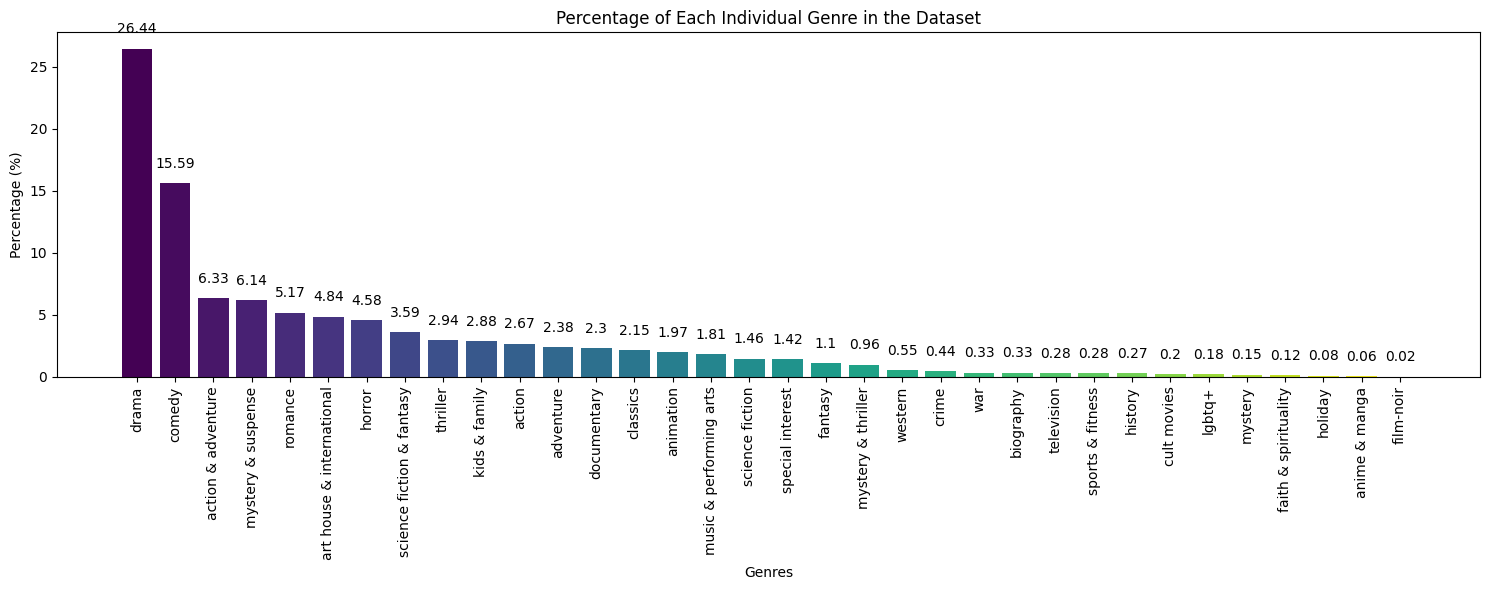

In [53]:
# Combine all genres into a single string and split them
all_genres = ','.join(merged_data_movies['genres'].explode().dropna())
split_genres = [genre.strip() for genre in all_genres.split(',')]

# Get the frequency of each individual genre
genre_counts = pd.Series(split_genres).value_counts()

# Calculate the percentage of each genre
genre_percentages = (genre_counts / genre_counts.sum()) * 100

# Sort genres by count in descending order
sorted_genres = genre_percentages.sort_values(ascending=False)

# Customizing color
colors = plt.cm.get_cmap('viridis', len(sorted_genres))  

plt.figure(figsize=(15, 6))
bars = plt.bar(sorted_genres.index, sorted_genres, color=colors(range(len(sorted_genres))))
plt.title('Percentage of Each Individual Genre in the Dataset')
plt.xlabel('Genres')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=90)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 4.3. CritiScore <a class="anchor" id="section_4_3"></a>

**CritiScore** is an aggregate scoring system devised to provide an overall assessment of a movie's quality by consolidating multiple individual rating metrics. It takes into account various existing metrics like audience ratings, professional reviews (Tomatometer), average percentage scores, IMDb ratings, and ReelView star ratings to generate a unified score representing the movie's overall reception.

### CritiScore Calculation

CritiScore is calculated as an equal-weighted aggregate score from the following ratings:

| Metric              | Scale      | Description                                           |
|---------------------|------------|-------------------------------------------------------|
| audience_rating     | 0-100      | Audience rating on a scale of 0 to 100                 |
| tomatometer_rating  | 0-100      | Tomatometer rating on a scale of 0 to 100              |
| percentage_mean     | 0-100      | Percentage mean score on a scale of 0 to 100           |
| imbd_rating         | 0-10       | IMDb rating on a scale of 0 to 10                      |
| stars_rating        | 0-5        | ReelView stars on a scale of 0 to 5                    |
| **CritiScore**      | 0-100      | Equal-weighted aggregate score from other ratings      |

The CritiScore is computed by normalizing each available rating, assigning an equal weight to each metric, and aggregating these normalized scores. It aims to provide a comprehensive evaluation by combining multiple perspectives on a movie's quality.


In [54]:
# Scaling IMDb rating to a range of 0-100
merged_data_movies['imdb_rating_scaled'] = merged_data_movies['imbd_rating'] * 10

# Scaling stars rating to a range of 0-100
merged_data_movies['stars_rating_scaled'] = merged_data_movies['stars_rating'] * 20

In [55]:
ratings = ['audience_rating', 'tomatometer_rating', 'percentage_mean', 'imdb_rating_scaled', 'stars_rating_scaled']
rating_stats = merged_data_movies[ratings].describe()
rating_stats.loc[['min', 'max']]

,audience_rating,tomatometer_rating,percentage_mean,imdb_rating_scaled,stars_rating_scaled
min,0.0,0.0,0.0,0.0,0.0
max,100.0,100.0,95.0,90.0,80.0


In [56]:
def calculate_criti_score(row):
    ratings = ['audience_rating', 'tomatometer_rating', 'percentage_mean', 'imdb_rating_scaled', 'stars_rating_scaled']
    available_ratings = [row[rating] for rating in ratings if row[rating] > 0]  # Check for non-zero ratings
    
    if len(available_ratings) == 0:
        return None  # No available ratings

    elif len(available_ratings) == 1:
        return available_ratings[0]  # Only one available rating, return it as CritiScore

    else:
        # Calculate weighted average for available ratings
        weights = [1 / len(available_ratings)] * len(available_ratings)
        criti_score = sum(available_ratings[i] * weights[i] for i in range(len(available_ratings)))
        return criti_score  # Return weighted average of available ratings

# Apply the function to calculate CritiScore for each row
merged_data_movies['CritiScore'] = merged_data_movies.apply(calculate_criti_score, axis=1)
    
# Remove rows with no available ratings
merged_data_movies.dropna(subset=['CritiScore'], inplace=True)

# Round the 'CritiScore' to the nearest whole number and cast to integer
merged_data_movies['CritiScore'] = merged_data_movies['CritiScore'].round(0).astype(int)

In [57]:
merged_data_movies.head(3)

,title,synopsis,review,genres,directors,authors,cast,runtime,production_company,tomatometer_rating,audience_rating,original_release_year,streaming_release_year,writer,percentage_mean,imbd_rating,stars_rating,imdb_rating_scaled,stars_rating_scaled,CritiScore
0,$9.99,"Residents of a Sydney, Australia, apartment co...",Its storyline isn't as wondrous as its visuals...,"animation, art house & international, comedy",Tatia Rosenthal,"Etgar Keret, Tatia Rosenthal","Geoffrey Rush, Anthony LaPaglia, Samuel Johnso...",78,Regent Releasing,73,55,2008,2017,0,0,0,0,0,0,64
1,'71,A young British soldier (Jack O'Connell) must ...,"Powerfully directed and acted, '71 stays true ...","action & adventure, drama",Yann Demange,Gregory Burke,"Jack O'Connell, Sean Harris, Jack Lowden, Char...",99,Roadside Attractions,96,81,2015,2016,0,0,0,0,0,0,88
2,'X'---The Man With the X-Ray Eyes,"Intent on enhancing mankind's ocular ability, ...","By turns lurid and disturbing, The Man with th...","cult movies, horror, science fiction & fantasy",Roger Corman,"Ray Russell, Robert Dillon","Ray Milland, Don Rickles, Harold J. Stone, Dia...",79,Orion Home Video,88,66,1963,2017,0,0,0,0,0,0,77


For curiosity, let's create bins and check the distribution of CritiScore.

C:\Users\Filhos\AppData\Local\Temp\ipykernel_2904\1540990332.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = get_cmap('viridis', num_bins)  # Generating colormap


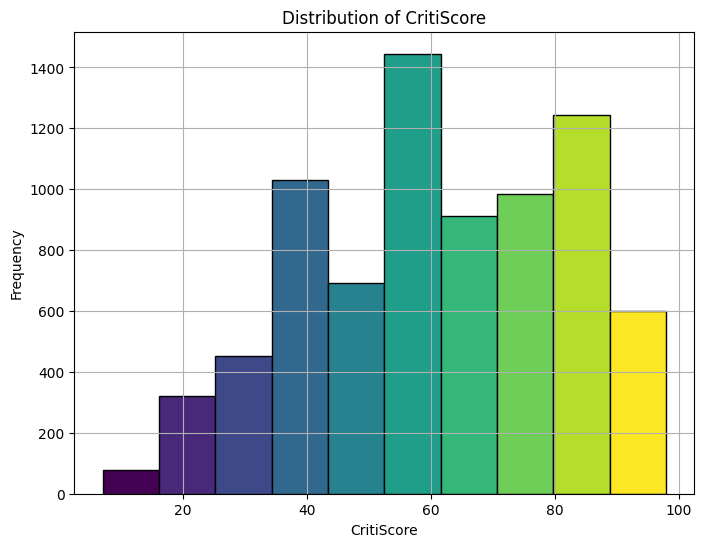

In [58]:
# Define the number of bins and create bins for the 'CritiScore' column
num_bins = 10  # Adjust the number of bins as needed
bins = pd.cut(merged_data_movies['CritiScore'], num_bins)

# Plot the histogram of CritiScore distribution with 'viridis' colormap
plt.figure(figsize=(8, 6))
colormap = get_cmap('viridis', num_bins)  # Generating colormap
plt.hist(merged_data_movies['CritiScore'], bins=num_bins, edgecolor='black')

# Set colors for each bar using the colormap
for i, patch in enumerate(plt.gca().patches):
    patch.set_facecolor(colormap(i))

plt.title('Distribution of CritiScore')
plt.xlabel('CritiScore')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## 4.4. Saving the Metadata with CritiScores <a class="anchor" id="section_4_4"></a>
Now we will delete unnecessary columns.

In [59]:
# List of columns to delete
columns_to_delete = ['tomatometer_rating', 'imbd_rating', 'audience_rating', 'imdb_rating_scaled', 'stars_rating_scaled']

# Dropping the specified columns
merged_data_movies.drop(columns=columns_to_delete, inplace=True)

Description of the Metadata:
| Column Name              | Description                                             |
|--------------------------|---------------------------------------------------------|
| `title`                  | The title of the movie.                                  |
| `synopsis`               | A brief summary or description of the movie.             |
| `review`                 | Reviews or critical assessments of the movie.            |
| `genres`                 | The genre or genres the movie belongs to.                |
| `directors`              | The director(s) of the movie.                            |
| `authors`                | The authors involved in the movie (if applicable).       |
| `cast`                   | The cast or actors appearing in the movie.               |
| `runtime`                | The duration or runtime of the movie.                    |
| `production_company`     | The company responsible for producing the movie.         |
| `original_release_year`  | The original release year of the movie.                  |
| `streaming_release_year` | The year the movie was released on streaming platforms.  |
| `writer`                 | The writer(s) of the movie.                              |
| `percentage_mean`        | A percentage-based metric indicating an average.         |
| `stars_rating`           | The rating of the movie in stars (e.g., out of 5 stars). |
| `CritiScore`             | A score or metric representing critical reception.       |


To store the metadata. We decided to created a folder.

In [60]:
# Define the path to the 'data' folder
data_folder_path = r'Data/'  # Replace 'path_to_your_data_folder' with the actual path

# Create a new folder named 'metadata' inside the 'data' folder
metadata_folder_path = os.path.join(data_folder_path, 'Metadata')

# Check if the 'metadata' folder already exists; if not, create it
if not os.path.exists(metadata_folder_path):
    os.makedirs(metadata_folder_path)
    print("The 'metadata' folder has been created.")
else:
    print("The 'metadata' folder already exists.")

The 'metadata' folder has been created.


In [61]:
# Save as CSV
merged_data_movies.to_csv(r'Data/Metadata/movies.csv', index=False)